# xG Heatmaps

In [18]:
import itertools
import numpy as np
import pandas as pd

np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
%matplotlib inline

![alt text](images/1280px-Football_pitch_metric_and_imperial.svg.png "Image")

By w:User:Chandler - I created this work entirely by myself., Public Domain, https://commons.wikimedia.org/w/index.php?curid=57883370

We have got enough to construct a heatmap that will define the probability of goals based on shots on target

Ifg the formula from David Sumpter's article is correct, then it should approximately line up to the data from Cartilage Free Captain

We will start by creating a matrix for the maximum sized pitch with a probability value representing every square yard

According to wikipedia, the maximum size pitch can be 100 yards wide (!) and 130 yards long.

Our heatmap will only cover quarter of the pitch, so we will cover 50 wide x 65 long = 6,500 square yards

Scan angle sketch and insert here

In [37]:
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def get_angle_length(pos):
    gw = 8
    gt = np.array([0, gw/2])
    gb = np.array([0, -gw/2])

    length = np.sqrt(np.power(pos[0],2) + np.power(pos[1],2))
    angle = angle_between(gt - pos, gb - pos)
    return length, angle
    
x = 10 ; y = 10
pos = np.array([x,y])
length, ang = get_angle_length(pos)
print(length)
print(ang)    

14.142135623730951
0.41012734054149097


In [38]:
pitch_length = np.linspace(1, 65, 65)
pitch_width = np.linspace(1, 50, 50) 
pitch = np.array(list(itertools.product(pitch_length, pitch_width)))
print(pitch)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 ...
 [65. 48.]
 [65. 49.]
 [65. 50.]]


In [60]:
angles = np.empty((50, 65))
for x_ind, x in enumerate(pitch_length):
    for y_ind, y in enumerate(pitch_width):
        _, angle = get_angle_length(np.array([x,y]))
        angles[y_ind, x_ind] = angle
angles

array([[2.62, 2.17, 1.82, ..., 0.13, 0.12, 0.12],
       [2.51, 2.03, 1.7 , ..., 0.13, 0.12, 0.12],
       [2.21, 1.76, 1.49, ..., 0.13, 0.12, 0.12],
       ...,
       [0.  , 0.01, 0.01, ..., 0.08, 0.08, 0.08],
       [0.  , 0.01, 0.01, ..., 0.08, 0.08, 0.08],
       [0.  , 0.01, 0.01, ..., 0.08, 0.08, 0.08]])

In [65]:
lengths = np.empty((50, 65))
for x_ind, x in enumerate(pitch_length):
    for y_ind, y in enumerate(pitch_width):
        length, _ = get_angle_length(np.array([x,y]))
        lengths[y_ind, x_ind] = angle
lengths

array([[0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08],
       [0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08],
       [0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08],
       ...,
       [0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08],
       [0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08],
       [0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08]])

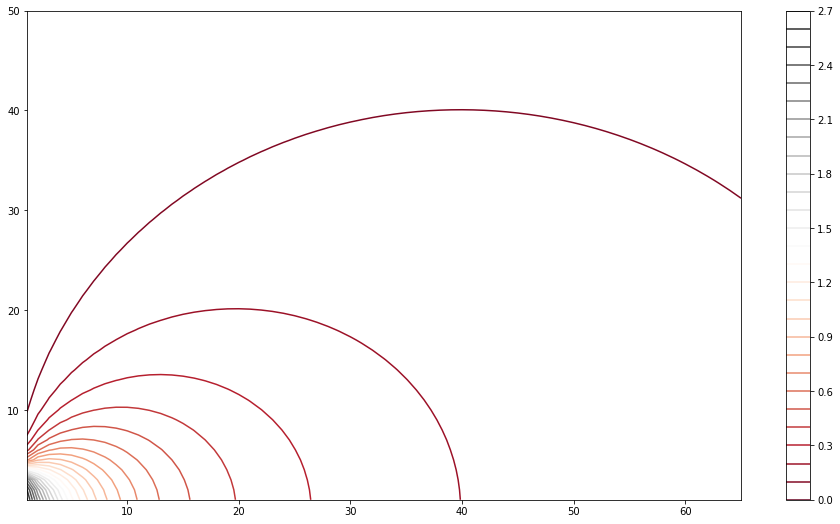

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
contour_plot = ax.contour(pitch_length, pitch_width, angles, 30, cmap='RdGy')
cbar = fig.colorbar(contour_plot)
plt.show()

In [63]:
xG_simple = 1/(1 + np.exp(3.90 - 3.54*angles))
xG_simple

array([[1.  , 0.98, 0.93, ..., 0.03, 0.03, 0.03],
       [0.99, 0.96, 0.89, ..., 0.03, 0.03, 0.03],
       [0.98, 0.91, 0.8 , ..., 0.03, 0.03, 0.03],
       ...,
       [0.02, 0.02, 0.02, ..., 0.03, 0.03, 0.03],
       [0.02, 0.02, 0.02, ..., 0.03, 0.03, 0.03],
       [0.02, 0.02, 0.02, ..., 0.03, 0.03, 0.03]])

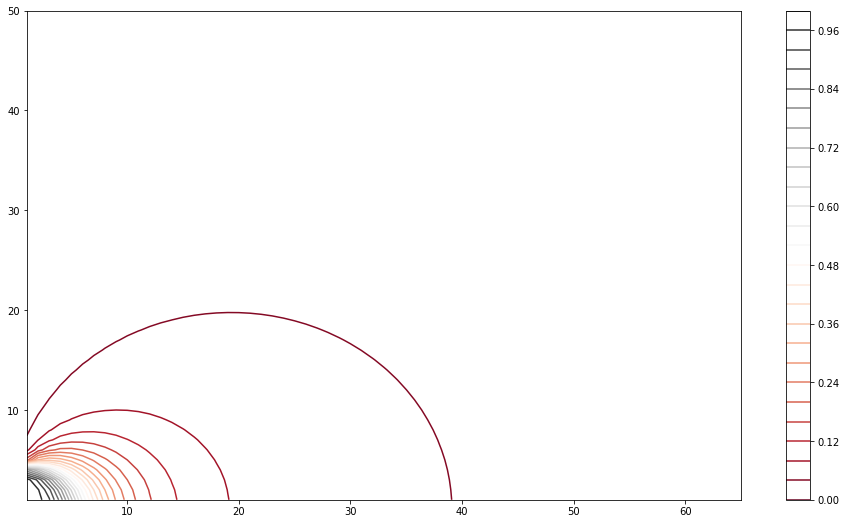

In [64]:
fig, ax = plt.subplots(figsize=(16,9))
contour_plot = ax.contour(pitch_length, pitch_width, xG_simple, 30, cmap='RdGy')
cbar = fig.colorbar(contour_plot)
plt.show()

In [67]:
#xG_complex = 1/(1 + np.exp(4.03 -2.58*angle - 0.12*xy[:,0] - 0.11*angle * xy[:,0] + (np.power(0.0069*xy[:,0],2))))
# x = xy[:,0].reshape((13,1))
xG_complex = 1/(1 + np.exp(4.03 -2.58*angles - 0.12*lengths - 0.11*angles*lengths + np.power(0.0069*lengths,2)))
xG_complex

array([[0.94, 0.83, 0.66, ..., 0.02, 0.02, 0.02],
       [0.92, 0.78, 0.59, ..., 0.02, 0.02, 0.02],
       [0.85, 0.63, 0.46, ..., 0.02, 0.02, 0.02],
       ...,
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02]])

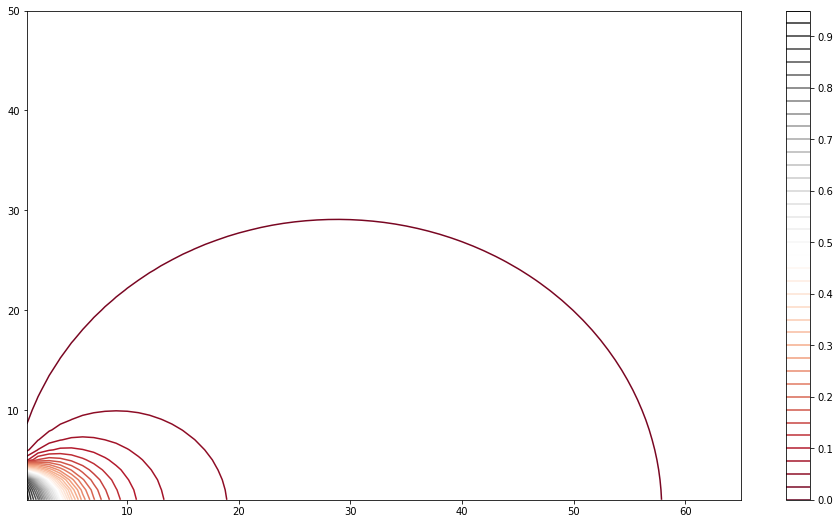

In [74]:
fig, ax = plt.subplots(figsize=(16,9))
contour_plot = ax.contour(pitch_length, pitch_width, xG_complex, 40, cmap='RdGy')
cbar = fig.colorbar(contour_plot)
plt.show()

This looks right in comparison to the simple model, and compared to the STATSBomb page

There is a table lifted from [Shot Matrix I: Shot Location and Expected Goals](https://cartilagefreecaptain.sbnation.com/2013/11/13/5098186/shot-matrix-i-shot-location-and-expected-goals)

![alt text](images/zones.png "Image")


![alt text](images/probabilities-table.png "Image")

We have got enough to construct a heatmap that will define the probability of goals based on shots on target

Ifg the formula from David Sumpter's article is correct, then it should approximately line up to the data from `Cartilage Free Captain`

We will start by creating a matrix for the maximum sized pitch with a probability value representing every square yard

According to wikipedia, the maximum size pitch can be 100 yards wide (!) and 130 yards long.

Our heatmap will only cover quarter of the pitch, so we will cover 50 wide x 65 long = 6,500 square yards

## References

https://medium.com/@Soccermatics/the-geometry-of-shooting-ae7a67fdf760

https://en.wikipedia.org/wiki/Football_pitch

https://statsbomb.com/2016/04/explaining-and-training-shot-quality/

https://cartilagefreecaptain.sbnation.com/2013/11/13/5098186/shot-matrix-i-shot-location-and-expected-goals